In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Loading Train and Test Data

In [4]:
train_data=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\Training(PM10 Air Quality Estimation).csv")
test_data=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\Test(PM10 MachineHack).csv")

In [5]:
train_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33038,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,2017-02-28 19:00:00,2017-02-28
33039,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,2017-02-28 20:00:00,2017-02-28
33040,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,2017-02-28 21:00:00,2017-02-28
33041,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,2017-02-28 22:00:00,2017-02-28


In [6]:
test_data

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,2013,3,1,18,11.0,8.0,20.0,500.0,70.0,3.1,1027.4,-18.4,0.0,NNE,2.1,01/03/13 18:00,01/03/13
1,2013,3,2,13,25.0,20.0,57.0,700.0,39.0,3.3,1025.7,-16.4,0.0,W,1.5,02/03/13 13:00,02/03/13
2,2013,3,3,13,98.0,50.0,81.0,1200.0,33.0,16.0,1011.5,-13.5,0.0,W,5.9,03/03/13 13:00,03/03/13
3,2013,3,4,4,7.0,14.0,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,04/03/13 4:00,04/03/13
4,2013,3,5,9,114.0,114.0,92.0,2899.0,84.0,7.7,1012.8,-8.4,0.0,NNE,1.5,05/03/13 9:00,05/03/13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2017,2,23,19,6.0,3.0,42.0,400.0,77.0,5.6,1022.0,-10.7,0.0,WSW,1.7,23/02/17 19:00,23/02/17
1299,2017,2,24,23,18.0,17.0,77.0,600.0,25.0,4.5,1021.5,-12.0,0.0,W,0.5,24/02/17 23:00,24/02/17
1300,2017,2,25,18,14.0,3.0,19.0,300.0,107.0,11.4,1016.4,-12.1,0.0,NNW,2.6,25/02/17 18:00,25/02/17
1301,2017,2,26,1,22.0,7.0,62.0,600.0,42.0,3.0,1020.7,-8.4,0.0,NE,0.6,26/02/17 1:00,26/02/17


### Data Preprocessing

In [7]:
df=train_data.copy()
dft=test_data.copy()

In [8]:
df.duplicated().sum()

0

In [9]:
dft.duplicated().sum()

0

In [10]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5        210
PM10           0
SO2          276
NO2          351
CO          1078
O3          1038
TEMP          20
PRES          20
DEWP          20
RAIN          20
wd            79
WSPM          14
DateTime       0
Date           0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
dft.isnull().sum()

year         0
month        0
day          0
hour         0
PM2.5        6
SO2         10
NO2         19
CO          47
O3          41
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd           2
WSPM         0
DateTime     0
Date         0
dtype: int64

In [13]:
dft=dft.ffill()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30615 entries, 0 to 33042
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        30615 non-null  int64  
 1   year      30615 non-null  int64  
 2   month     30615 non-null  int64  
 3   day       30615 non-null  int64  
 4   hour      30615 non-null  int64  
 5   PM2.5     30615 non-null  float64
 6   PM10      30615 non-null  float64
 7   SO2       30615 non-null  float64
 8   NO2       30615 non-null  float64
 9   CO        30615 non-null  float64
 10  O3        30615 non-null  float64
 11  TEMP      30615 non-null  float64
 12  PRES      30615 non-null  float64
 13  DEWP      30615 non-null  float64
 14  RAIN      30615 non-null  float64
 15  wd        30615 non-null  object 
 16  WSPM      30615 non-null  float64
 17  DateTime  30615 non-null  object 
 18  Date      30615 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 4.7+ MB


In [15]:
df['year'].value_counts()

2015    7950
2016    7933
2014    7693
2013    5753
2017    1286
Name: year, dtype: int64

In [16]:
df=df.drop(['No'], axis=1)

In [17]:
df.head(2)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,DateTime,Date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00,2013-03-01
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00,2013-03-01


In [18]:
df.iloc[:,:4]=df.iloc[:,:4].astype('category')
df.iloc[:,-2:]=df.iloc[:,-2:].astype('datetime64[ns]')
dft.iloc[:,:4]=dft.iloc[:,:4].astype('category')
dft.iloc[:,-2:]=dft.iloc[:,-2:].astype('datetime64[ns]')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30615 entries, 0 to 33042
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      30615 non-null  category      
 1   month     30615 non-null  category      
 2   day       30615 non-null  category      
 3   hour      30615 non-null  category      
 4   PM2.5     30615 non-null  float64       
 5   PM10      30615 non-null  float64       
 6   SO2       30615 non-null  float64       
 7   NO2       30615 non-null  float64       
 8   CO        30615 non-null  float64       
 9   O3        30615 non-null  float64       
 10  TEMP      30615 non-null  float64       
 11  PRES      30615 non-null  float64       
 12  DEWP      30615 non-null  float64       
 13  RAIN      30615 non-null  float64       
 14  wd        30615 non-null  object        
 15  WSPM      30615 non-null  float64       
 16  DateTime  30615 non-null  datetime64[ns]
 17  Date      30

<Axes: xlabel='month', ylabel='PM10'>

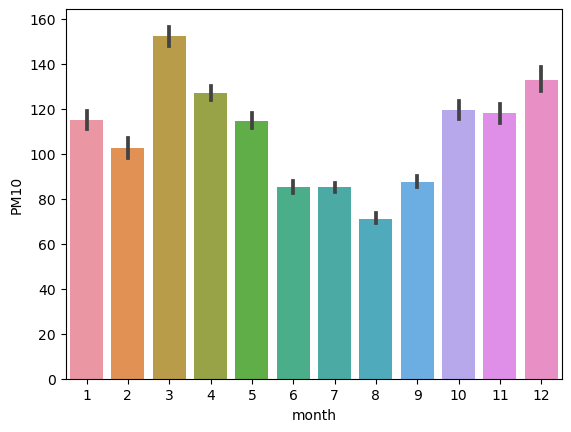

In [20]:
sns.barplot(df, x='month', y='PM10')

In [21]:
df.drop(['DateTime', 'Date'], axis=1, inplace=True)
dft.drop(['DateTime', 'Date'], axis=1, inplace=True)

In [22]:
df=df.reset_index()

### Removing Outliers

<Axes: >

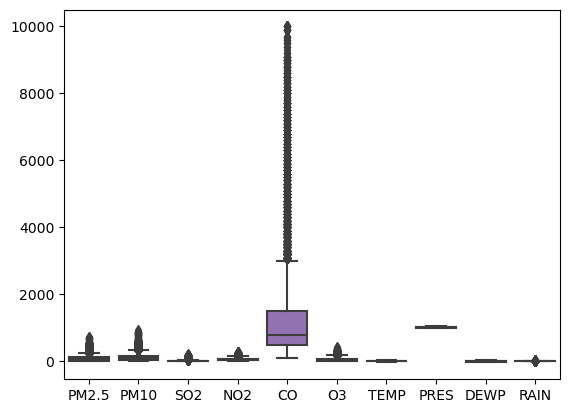

In [23]:
sns.boxplot(df.iloc[:,5:15])

In [24]:
for col in df.iloc[:,5:15].columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    max=q3+1.5*iqr
    df[col]=np.where(df[col]>max, max, df[col])

<Axes: >

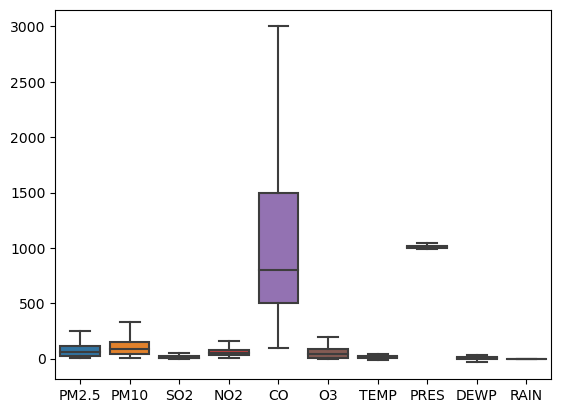

In [25]:
sns.boxplot(df.iloc[:,5:15])

### Data Encoding

In [26]:
encoder=OneHotEncoder(sparse_output=False)
one_hot=encoder.fit_transform(pd.DataFrame(df.loc[:,'wd']))

In [27]:
one_hot_df=pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['wd']))

In [28]:
df=pd.concat([df, one_hot_df], axis=1)

In [29]:
df=df.drop(['index', 'wd'], axis=1)

In [30]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.iloc[:,15:]=df.iloc[:,15:].astype('category')

In [32]:
dft=dft.reset_index()

In [33]:
one_hot=encoder.fit_transform(pd.DataFrame(dft.loc[:,'wd']))
one_hot_dft=pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['wd']))
dft=pd.concat([dft, one_hot_dft], axis=1)
dft=dft.drop(['index', 'wd'], axis=1)

In [34]:
dft.iloc[:,14:]=dft.iloc[:,14:].astype('category')

### Identifying Best Features

In [35]:
Y=df['PM10']
X=df.drop(['PM10'], axis=1)

In [36]:
from sklearn.feature_selection import f_regression, SelectKBest
best=SelectKBest(score_func=f_regression, k='all')
best.fit(X,Y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000027B830D5AB0>)

In [37]:
df_scores=pd.DataFrame(best.scores_, columns=['Scores'], index=best.get_feature_names_out()).sort_values(by='Scores', ascending=False)

In [38]:
df_scores.head()

,Scores
PM2.5,116509.272110
CO,30847.741231
NO2,25473.087296
SO2,10678.873726
WSPM,1427.107944


In [39]:
Y=df['PM10']
X=df.drop(['PM10'], axis=1)

### Determining Best Model

In [40]:
reg=[LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]

In [41]:
for i in reg:
    cross_val_res=cross_val_score(i, X,Y, cv=5,  scoring=make_scorer(mean_squared_error))
    print("MSE for",i,"is:", np.mean(cross_val_res))

MSE for LinearRegression() is: 1305.3331420436368
MSE for SVR() is: 3144.212549142603
MSE for DecisionTreeRegressor() is: 2350.0923155316023
MSE for RandomForestRegressor() is: 1157.8211976650662
MSE for ExtraTreesRegressor() is: 1108.2650676364528


### ExtraTreesRegressor Modeling

In [49]:
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [50]:
pred=model.predict(dft)

In [51]:
pred=pd.DataFrame(pred, columns=['PM10'])

In [52]:
pred

,PM10
0,24.710
1,39.020
2,149.420
3,23.140
4,159.265
...,...
1298,23.560
1299,44.040
1300,34.370
1301,35.050


### Submission File

In [53]:
sub_data=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\Submission.csv")

In [54]:
sub_data=pred

In [55]:
sub_data.to_csv("C:\\Users\\subha\\OneDrive\\Desktop\\Submission.csv", index=False, mode='w')